In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from myconfig import ROOT_DIR, DATASET_DIR

mm = 1 / 25.4

In [2]:
data = pd.read_json(ROOT_DIR/'results'/'simulation-exec-time.jsonl', lines=True)

groups = data.groupby('conditionID')

In [3]:
conditions = pd.read_csv(DATASET_DIR/'01-simulation01'/'conditions.tsv', sep='\t')
default = conditions.iloc[0]

cond_groups = {
    key: pd.concat([
        default.to_frame().T, 
        conditions[conditions[key] != default[key]]
    ]).sort_values(by=key)
    for key in ['lmax', 'ncat', 'ntips', 'nOGs']
}

In [4]:
panel_cols = ['lmax', 'ncat', 'ntips', 'nOGs']
panel_rows = ['cpy_change_rates', 'cat_switch_rates', 'cpy_root_probs', 'cat_root_probs']

xlabels = dict(
    lmax  = '$l_\mathrm{max}$ (max copy)', 
    ncat  = '$K$ (#categories)', 
    nOGs  = '$N$ (#OGs)', 
    ntips = '$D$ (#tips)', 
)

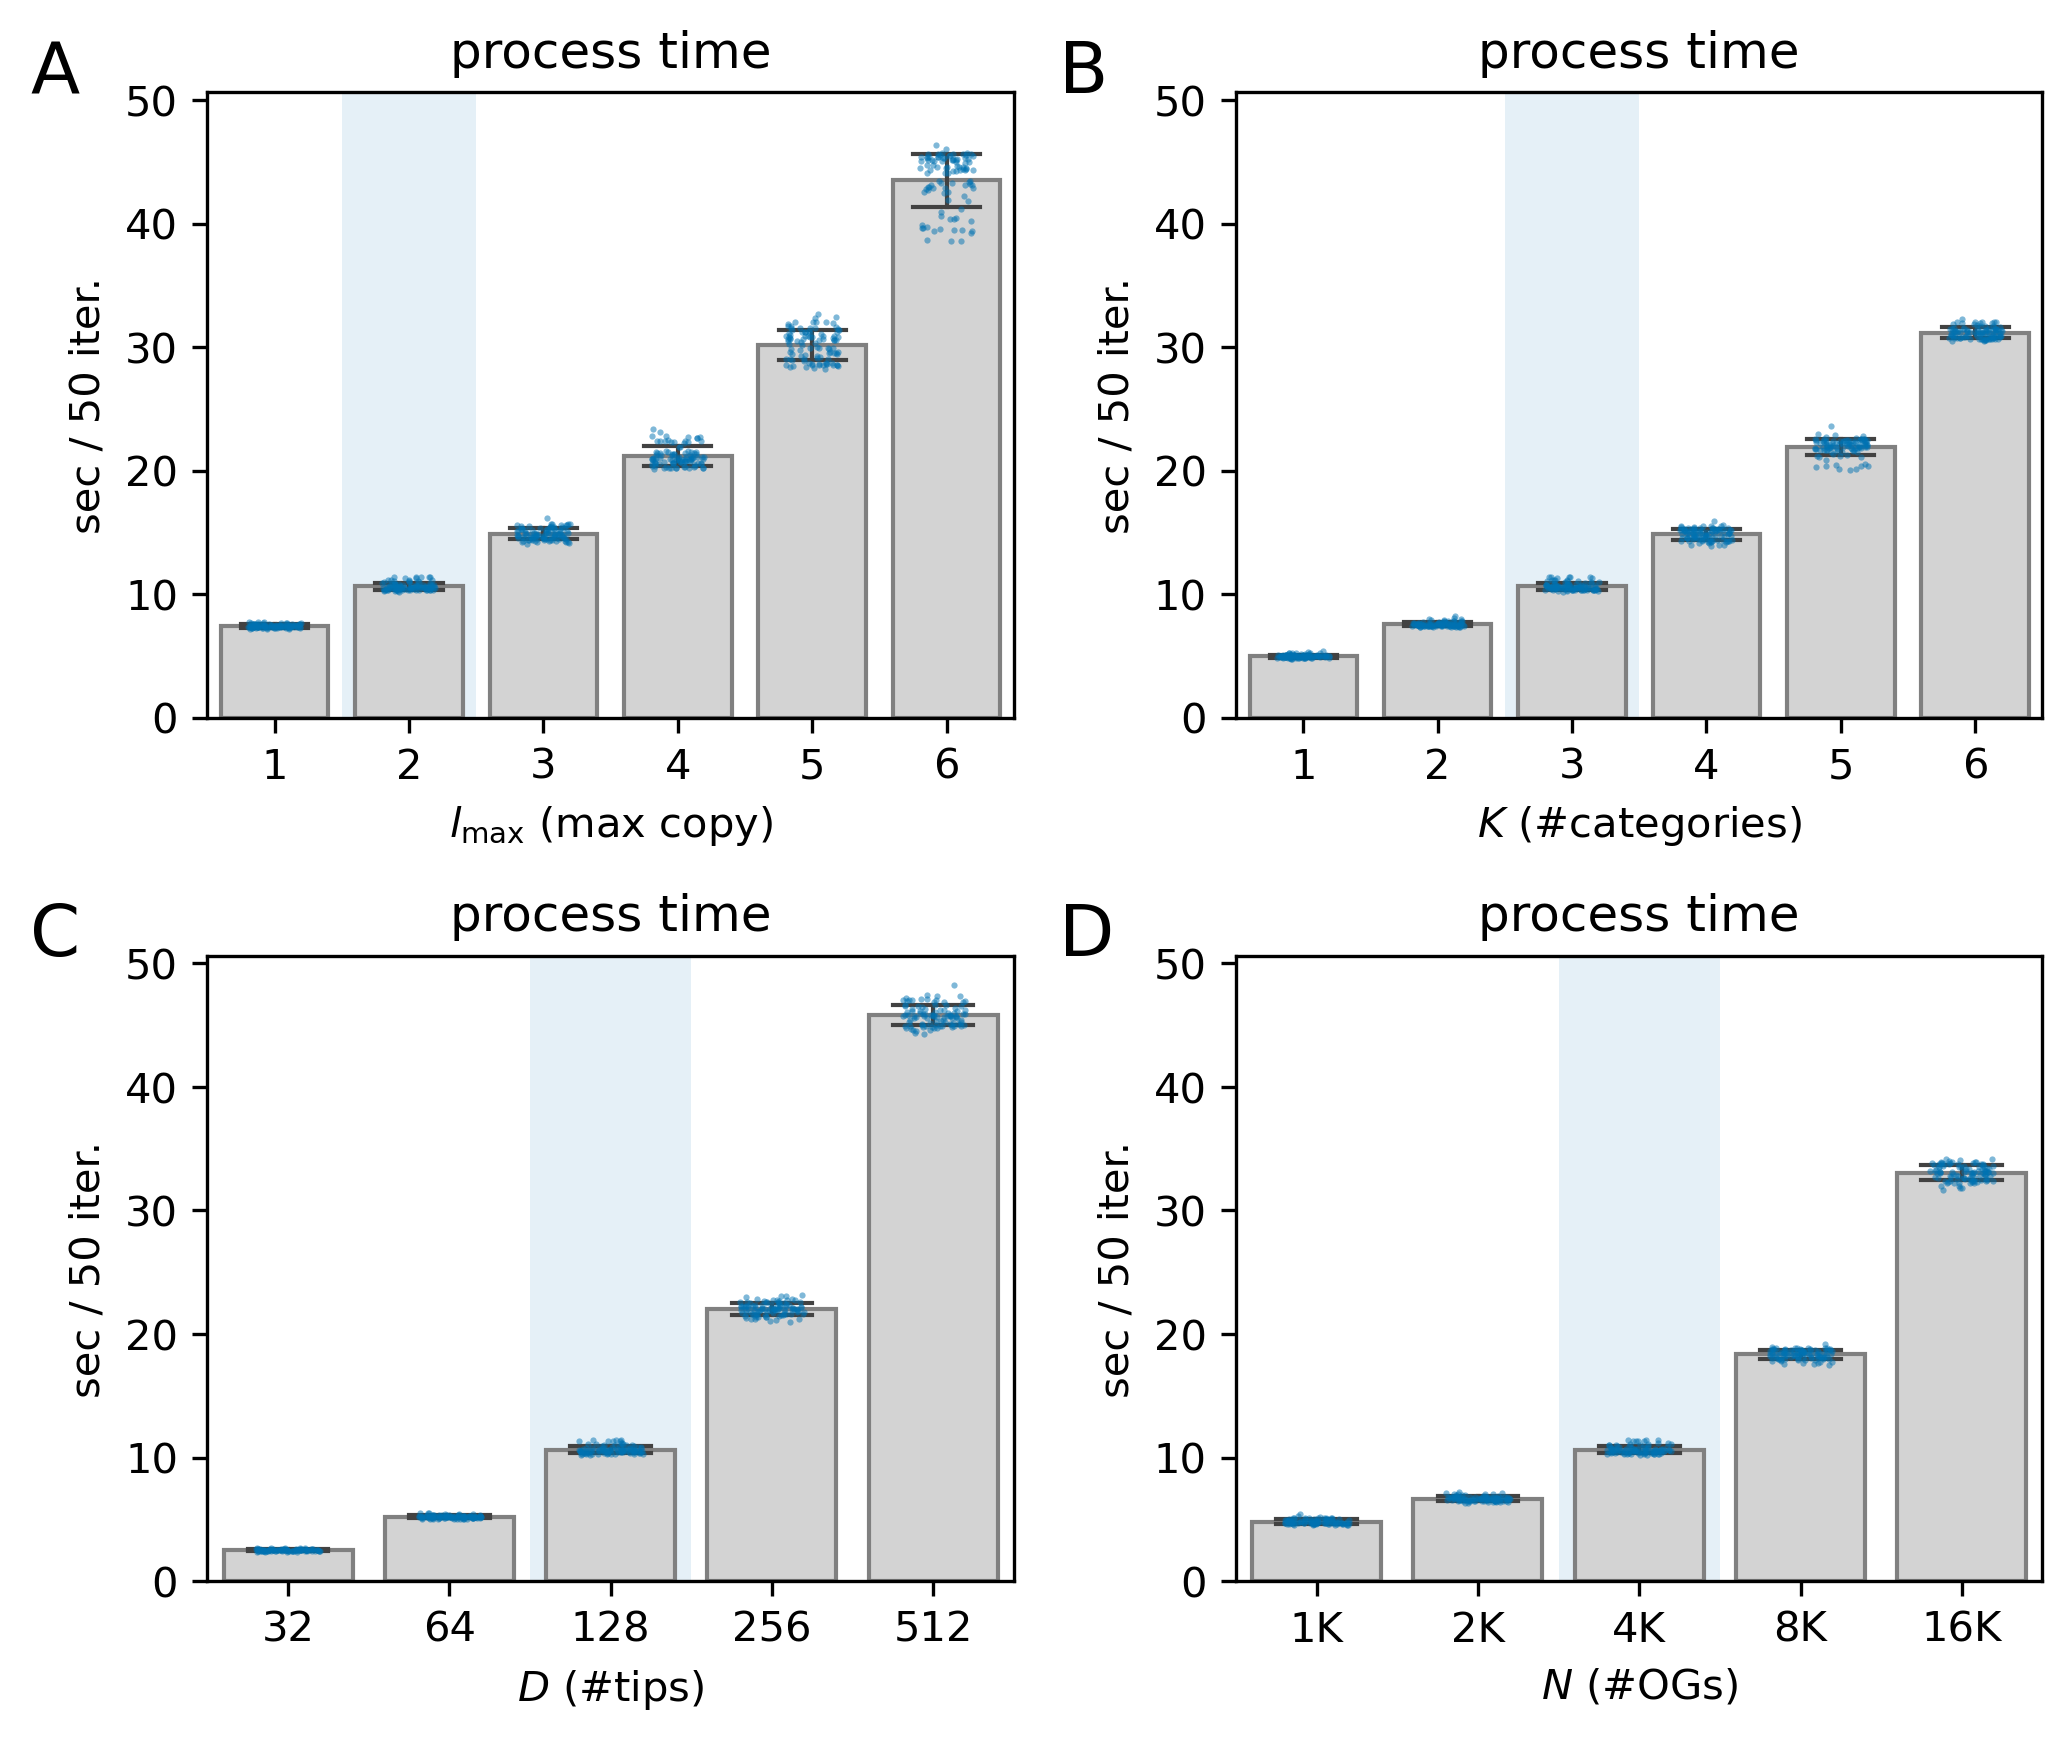

In [5]:
np.random.seed(42)

fig, axes = plt.subplots(
    2, 2, layout='tight', figsize=(178*mm, 150*mm), dpi=300, sharey=True
)

for idx, key, ax in zip('ABCD', panel_cols, axes.flat):
    tmp = data.loc[data['conditionID'].isin(cond_groups[key]['conditionID'])]
    dx = cond_groups[key][key].to_list().index(default[key])
    ax.axvspan(dx-0.5, dx+0.5, alpha=0.1, fc='#0072B2')
    
    sns.barplot(
        x=key, y='process_time', data=tmp, 
        lw=1, fc='lightgray', ec='gray', 
        errorbar='sd', capsize=0.5, errwidth=1, ax=ax
    )
    sns.stripplot(
        x=key, y='process_time', data=tmp, 
        color='#0072B2', jitter=0.2, s=1.5, alpha=0.5, ax=ax
    )            
    ax.set_xlabel(xlabels[key], visible=True)
    ax.set_ylabel('sec / 50 iter.')
    ax.set_title('process time')
    ax.yaxis.set_tick_params(labelleft=True)
    
    ax.text(-0.22, 1, idx, fontsize='xx-large', transform=ax.transAxes)    
    
    if key != 'nOGs':
        continue
    ax.set_xticklabels(cond_groups[key][key].astype(str).str.replace('000', 'K'))

fig.savefig('jpg/exec-time.jpg', bbox_inches='tight', dpi=350)
fig.savefig('png/exec-time.png', bbox_inches='tight', dpi=350)
fig.savefig('pdf/exec-time.pdf', bbox_inches='tight')